<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyses-descriptives-de-la-base" data-toc-modified-id="Analyses-descriptives-de-la-base-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyses descriptives de la base</a></span><ul class="toc-item"><li><span><a href="#Informations-diverses-sur-le-milieu-foncier" data-toc-modified-id="Informations-diverses-sur-le-milieu-foncier-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Informations diverses sur le milieu foncier</a></span><ul class="toc-item"><li><span><a href="#Mutation-et-disposition" data-toc-modified-id="Mutation-et-disposition-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Mutation et disposition</a></span></li></ul></li><li><span><a href="#Ressources-pour-l'analyse" data-toc-modified-id="Ressources-pour-l'analyse-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ressources pour l'analyse</a></span></li><li><span><a href="#Import-des-données" data-toc-modified-id="Import-des-données-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Import des données</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Table-mutation-brute" data-toc-modified-id="Table-mutation-brute-1.3.0.1"><span class="toc-item-num">1.3.0.1&nbsp;&nbsp;</span>Table <em>mutation brute</em></a></span></li><li><span><a href="#Table-disposition_parcelle_geompar" data-toc-modified-id="Table-disposition_parcelle_geompar-1.3.0.2"><span class="toc-item-num">1.3.0.2&nbsp;&nbsp;</span>Table <em>disposition_parcelle_geompar</em></a></span></li><li><span><a href="#Table-disposition_parcelle_geomloc" data-toc-modified-id="Table-disposition_parcelle_geomloc-1.3.0.3"><span class="toc-item-num">1.3.0.3&nbsp;&nbsp;</span>Table <em>disposition_parcelle_geomloc</em></a></span></li><li><span><a href="#Table-local_geomloc" data-toc-modified-id="Table-local_geomloc-1.3.0.4"><span class="toc-item-num">1.3.0.4&nbsp;&nbsp;</span>Table <em>local_geomloc</em></a></span></li><li><span><a href="#Table-mutation_geomlocmut" data-toc-modified-id="Table-mutation_geomlocmut-1.3.0.5"><span class="toc-item-num">1.3.0.5&nbsp;&nbsp;</span>Table <em>mutation_geomlocmut</em></a></span></li><li><span><a href="#Table-geompar" data-toc-modified-id="Table-geompar-1.3.0.6"><span class="toc-item-num">1.3.0.6&nbsp;&nbsp;</span>Table <em>geompar</em></a></span></li><li><span><a href="#Table-geomparmut" data-toc-modified-id="Table-geomparmut-1.3.0.7"><span class="toc-item-num">1.3.0.7&nbsp;&nbsp;</span>Table <em>geomparmut</em></a></span></li></ul></li></ul></li></ul></li></ul></div>

# Informations générales

Ce document a vocation à fournir une analyse descriptive de la base DVF+open data (disponible [ici](https://cerema.app.box.com/v/dvfplus-opendata)).

Une présentation des bases DVF, DVF+ et DV3F est disponible [ici](http://doc-datafoncier.cerema.fr/dv3f/tuto/objectif_tutoriel).

Un dictionnaire des variables est disponible [ici](http://doc-datafoncier.cerema.fr/dv3f/doc/table/mutation)


Pour chaque région, un fichier archivé (au format .zip) est disponible et contient :
- une table **mutation** 
- des fichiers **disposition_parcelle** (au format shp)
- des tables **local**

Le schéma suivant illustre les liens entre les différentes tables : 

![illu](http://doc-datafoncier.cerema.fr/dv3f/static/tutodvf/img/diagramme_dvf_plus_simple.jpg)

## Informations diverses sur le milieu foncier

### Mutation et disposition
Une *mutation* est une transaction permettant le passage de propriété d'un ou plusieurs biens entre un vendeur et un acheteur. Elle se matérialise par un acte notarié (le plus souvent, un acte de vente). 

Concrètement, une mutation peut comprendre un mélange presque illimité des biens suivants :

- une parcelle nue (terrain),
- un local (appartement, maison, local d'activité, dépendance),
- un volume (division de propriété très particulière).

(Si j'ai bien compris **à vérifier** : chaque élément de la mutation est appelé disposition).

Par exemple, la retranscription d'une vente de maison dans DV3F sera en général une mutation comprenant une parcelle et un local de type maison.

La majorité des mutations sont composées d'une seule disposition (98.7 %).

## Ressources pour l'analyse

In [1]:
import pandas as pd
import re
import geopandas as gpd
import matplotlib.pyplot as plt

Lecture d'une carte des contours départementaux pour facilier l'analyse : 

<AxesSubplot:>

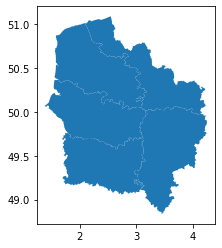

In [2]:
contours_dep = gpd.read_file("C:/Users/khale/OneDrive/Documents/Ensae/Python pour le data scientist/Projet/Immo/Données/contours_dep/departements-20140306-100m.shp")
contours_dep_nord = contours_dep[contours_dep["code_insee"].isin(('59','62','02','60','80'))]
contours_dep_nord.plot()

In [3]:
import json

# read file
with open('C:/Users/khale/OneDrive/Documents/Ensae/Python pour le data scientist/Projet/Immo/Données/adresse_cadastre__02/cadastre-02168-parcelles.json', 'r') as myfile:
    data=myfile.read()

# parse file
obj = json.loads(data)

<AxesSubplot:>

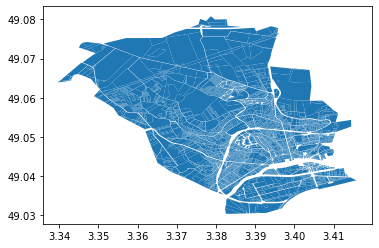

In [4]:
cadastre_test_com = gpd.GeoDataFrame.from_features(obj["features"])
cadastre_test_com.plot()

## Analyse de la table *mutation_brute*

### Description des variables

Afin d'estimer en premier lieu la faisabilité du projet, l'analyse descrptive va être réalisée sur une seule région : ici la région Hauts-de-France.

In [5]:
dossier_donnees = "C:/Users/khale/OneDrive/Documents/Ensae/Python pour le data scientist/Projet/Immo/Données/r32/"

In [6]:
mutation_brute = pd.read_csv(dossier_donnees + "r32_mutation.csv")
mutation_brute.shape

(569592, 61)

La liste des colonnes de la table *mutation_brute* :

In [21]:
" ".join(mutation_brute.columns)

'idmutation idmutinvar idopendata idnatmut codservch refdoc datemut anneemut moismut coddep libnatmut nbartcgi l_artcgi vefa valeurfonc nbdispo nblot nbcomm l_codinsee nbsection l_section nbpar l_idpar nbparmut l_idparmut nbsuf sterr l_dcnt nbvolmut nblocmut l_idlocmut nblocmai nblocapt nblocdep nblocact nbapt1pp nbapt2pp nbapt3pp nbapt4pp nbapt5pp nbmai1pp nbmai2pp nbmai3pp nbmai4pp nbmai5pp sbati sbatmai sbatapt sbatact sapt1pp sapt2pp sapt3pp sapt4pp sapt5pp smai1pp smai2pp smai3pp smai4pp smai5pp codtypbien libtypbien'

Les variables identificatrices contenant **id**

In [ ]:
" ".join(re.findall(r'(id\w+)+'," ".join(mutation_brute.columns)))

D'après la documentation, on trouve que :
- idmutation : identifiant de clef primaire de la table mutation
- idmutinvar : identifiant invariant de la mutation. Il vaut mieux utiliser cette variable car elle ne changera pas si on décide d'utiliser une autre version alors que *idmutation* correspond juste à un numéro de ligne (ou presque).
- idopendata : identifiction de mutation
- idnatmut : identifiant de clef primaire de la table *ann_nature_mutation*
- l_idpar : identifiant parcelle
- l_idparmut
- l_idlocmut

Autres variables potentiellement intéressantes : 
- libnatmut : Nature de la mutation selon six modalités (Vente, Vente en l'état futur d'achèvement, Adjudication, Echange, Vente terrain à bâtir et Expropriation)
- anneemut / datemut / moismut / coddep
- valeurfonc : valeur du bien avec TVA sans frais de notaire, frais d'agence ou vente ds biens meubles
- nbdispo : nombre de dispositions associées à la mutation
- nblot : nombre total de lots dans la mutation
- libtypbien
- nbcomm : nombre de communes concernées par la mutaiton


- sterr : surface de terrain ayant muté
- nbvolmut : nombre de volumes ayant muté
- nblocmut : nombre de locaux ayant muté
- l_idlocmut : liste des identifiants de locaux ayant muté
- nblocmai : nombre de maisons ayant muté
- nblocapt : nombre d'appartements ayant muté
- nblocdep : nombre de dépendances ayant muté
- nblocact : nombre de locaux d'activités ayant muté (un local regroupe les maisons, l'appartement, la dépendance et l'activité)
- nbapt1pp : nombre d'appartements avec une pièce principale ayant muté
- sbabi : surface de l'ensemble du bâti ayant muté
- sbatmai : surface de l'emsemble des maisons ayant muté
- sbatapt : surface de l'ensemble des appartements ayant muté

**Quid de la différence entre section, parcelle ?
Quelle est la différence entre idpar et idparmut ? **

- l_doinsee : liste des codes Insee des communes concernées par la mutation
- l_section : liste des sections concernées par la mutation
- l_idpar : liste des identifiants de parcelles concernées par la mutation (idpar)
- l_idparmut : liste des identifiants de parcelles ayant muté (nbparmut par exemple)


Nombre de lignes différentes selon idmutation

In [24]:
len(mutation_brute["idmutation"].drop_duplicates())

569592

### Valeurs manquantes

### Variables d'intérêt

##### Distribution des mutations en fonction du type. Pour rappel : 

| Modalité |            Signification           |
|:--------:|:----------------------------------:|
|     1    |                Vente               |
|     2    | Vente en l'état futur d'achèvement |
|     3    |            Expropriation           |
|     4    |        Vente terrain à bâtir       |
|     5    |            Adjuvication            |
|     6    |               Echange              |

In [9]:
100*mutation_brute.groupby(by = "idnatmut")["idmutinvar"].count() / len(mutation_brute)

idnatmut
1    94.006236
2     4.588021
3     0.007900
4     0.439964
5     0.461207
6     0.496671
Name: idmutinvar, dtype: float64

94 % des mutations sont des ventes et 4.6 % sont des ventes en l'état futur d'achèvement. Ces modalités sont en adéquation avec notre problématique. Nous allons donc dans la suite restreindre notre table à ces modalités

In [10]:
mutation_vente = mutation_brute[mutation_brute["idnatmut"].isin(range(2))].reset_index()

##### Vente par année et par département

<AxesSubplot:xlabel='anneemut'>

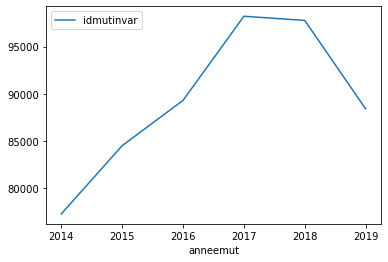

In [11]:
mutation_vente.groupby("anneemut")[["idmutinvar"]].count().plot()

On retrouve plus de mutations dans le Nord (59) : assez logique car le département du Nord est le département le plus peuplé des Hauts-de-France.

<AxesSubplot:xlabel='coddep'>

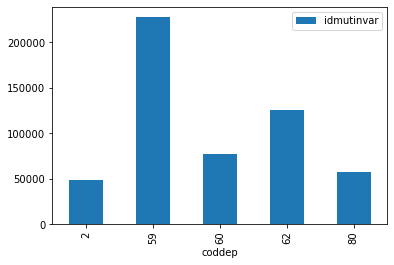

In [12]:
mutation_vente.groupby("coddep")[["idmutinvar"]].count().plot.bar()

##### Distribution des types de biens

In [19]:
mutation_vente["libtypbien"].drop_duplicates()

0                      TERRAIN ARTIFICIALISE MIXTE
1                    TERRAIN NON BATIS INDETERMINE
2                     TERRAIN DE TYPE TERRE ET PRE
3                                TERRAIN FORESTIER
6                                   UN APPARTEMENT
7                                       UNE MAISON
8                                      DES MAISONS
9                              TERRAIN DE TYPE TAB
11                                  TERRAIN VERGER
12                                  UNE DEPENDANCE
16                              TERRAIN D'AGREMENT
20                                        ACTIVITE
26                                TERRAIN VITICOLE
33       BATI - INDETERMINE : Vente avec volume(s)
39                          TERRAIN LANDES ET EAUX
72                  BATI MIXTE - LOGEMENT/ACTIVITE
84                           TERRAIN NATUREL MIXTE
328                        APPARTEMENT INDETERMINE
376                              DEUX APPARTEMENTS
956                            

<AxesSubplot:xlabel='libtypbien'>

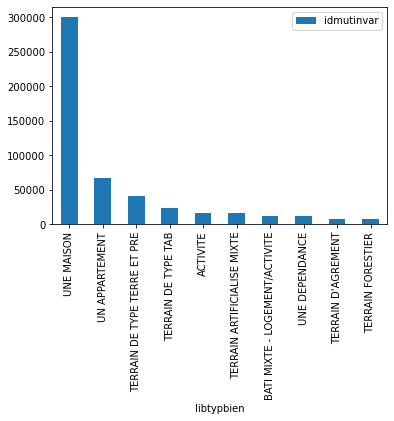

In [16]:
mutation_vente.groupby("libtypbien")[["idmutinvar"]].count().sort_values("idmutinvar",ascending = False).head(10).plot.bar()

#### Restriction de la table mutation seulement aux ventes d'appartements ou de maison

In [20]:
reg_maison_appar = re.compile(".*(MAISON|APPARTEMENT).*")
decompte_par_type_bien = mutation_vente.groupby("libtypbien")[["idmutinvar"]].count().reset_index()
decompte_par_type_bien[decompte_par_type_bien["libtypbien"].str.match(reg_maison_appar)]

,libtypbien,idmutinvar
1,APPARTEMENT INDETERMINE,5707
6,DES MAISONS,6881
7,DEUX APPARTEMENTS,3629
8,MAISON - INDETERMINEE,28
22,UN APPARTEMENT,67480
24,UNE MAISON,300090


Remarque : 
- des mutations qui concernent "deux appartements", "des maisons" --> Plusieurs biens sur une mutation ?
- très peu de maison - indéterminée mais beaucoup d'appartements indéterminés.

#### Parcelles associées